In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.io import wavfile
from scipy.fftpack import fft,ifft,dct,idct
import pywt

In [2]:
L=2000
N=65536

In [3]:
rate, x = wavfile.read('audio.wav')

In [4]:
r=[]
for i in range(N):
    r.append(x[i])

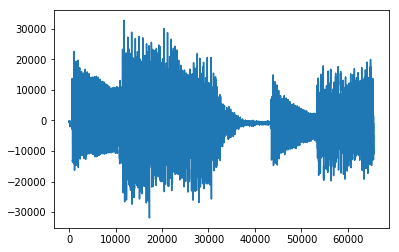

In [5]:
plt.plot(r)
plt.show()

In [6]:
D=fft(r)
D=np.array(D)
r=np.array(r)

In [7]:
scipy.io.wavfile.write(('dft.wav'),rate,D.astype(r.dtype))

C:\Users\padma\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


In [8]:
def energy_compact_Xm(X,L):
    Xm1=[]
    N=len(X)
    for i in range(N):
        if i<=int((N-1-L)/2):
            Xm1.append(X[i])
        elif i>=int((N+1+L)/2) and i<=N-1:
            Xm1.append(X[i])
    return Xm1

In [9]:
Xm1=energy_compact_Xm(D,L)
Xm1=np.array(Xm1)
scipy.io.wavfile.write(('compactdft.wav'),rate,Xm1.astype(r.dtype))

C:\Users\padma\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
def energy_decompact_Xm(N):
    r1, a = wavfile.read('compactdft.wav')
    Xm1=[]
    for i in range(N-L):
        Xm1.append(a[i])
    Xm2=[]
    for i in range(N):
        if i<=int((N-1-L)/2):
            Xm2.append(Xm1[i])
        elif i>=int((N+1-L)/2) and i<=int((N-1+L)/2):
            Xm2.append(0)
        elif i>=int((N+1+L)/2) and i<=N-1:
            p=i-L
            Xm2.append(Xm1[p])
    return Xm2

In [11]:
Xm2=energy_decompact_Xm(N)
len(Xm2)

65536

In [12]:
xm1=ifft(Xm2)
xm1=np.array(xm1)
scipy.io.wavfile.write(('resultdft.wav'),rate,Xm1.astype(r.dtype))

C:\Users\padma\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
C=dct(r)
C=np.array(C)

In [14]:
scipy.io.wavfile.write(('dct.wav'),rate,C.astype(r.dtype))

In [15]:
def energy_compact_dct(C,L):
    N=len(C)
    Xm2=[]
    for i in range(N):
        if i<=(N-1-L):
            Xm2.append(C[i])
    return Xm2

In [16]:
Xm2=energy_compact_dct(C,L)
Xm2=np.array(Xm2)
scipy.io.wavfile.write(('compactdct.wav'),rate,Xm2.astype(r.dtype))

In [17]:
def energy_decompact(N,L):
    r1, a = wavfile.read('compactdct.wav')
    Xm1=[]
    for i in range(N-L):
        Xm1.append(a[i])
    Xm2=[]
    for i in range(N):
        if i<=(N-1-L):
            Xm2.append(Xm1[i])
        else:
            Xm2.append(0)
    return Xm2

In [18]:
Xm2=energy_decompact(N,L)
xm2=idct(Xm2)/(2*rate)
xm2=np.array(xm2)
scipy.io.wavfile.write(('resultdct.wav'),rate,xm2.astype(r.dtype))

In [19]:
def haar(x):
    out = []
    (ca, cd) = pywt.dwt(x,'haar')
    out = list(cd)+out
    while len(ca)!=1:
        (ca, cd) = pywt.dwt(ca,'haar')
        out = list(cd)+out
    out = list(ca)+out
    return out

In [20]:
def ihaar(x):
    N = len(x)
    i = 0
    x[:2] = pywt.idwt([x[0]], [x[1]],'haar')
    i = 2
    while 2*i<N+1:
        try:
            x[:2*i] = pywt.idwt(x[:i],x[i:2*i],'haar')
        except:
            print(i)
            return
        i = 2*i
    return x

In [21]:
H=haar(r)
H=np.array(H)

In [22]:
scipy.io.wavfile.write(('haar.wav'),rate,H.astype(r.dtype))

In [23]:
def energy_compact_haar(H,L):
    N=len(C)
    Xm2=[]
    for i in range(N):
        if i<=(N-1-L):
            Xm2.append(C[i])
    return Xm2

In [24]:
Xm2=energy_compact_haar(H,L)
Xm2=np.array(Xm2)
scipy.io.wavfile.write(('compacthaar.wav'),rate,Xm2.astype(r.dtype))

In [25]:
def energy_decompact_haar(N,L):
    r1, a = wavfile.read('compacthaar.wav')
    Xm1=[]
    for i in range(N-L):
        Xm1.append(a[i])
    Xm2=[]
    for i in range(N):
        if i<=(N-1-L):
            Xm2.append(Xm1[i])
        else:
            Xm2.append(0)
    return Xm2

In [26]:
Xm2=energy_decompact_haar(N,L)
xm2=ihaar(Xm2)
xm2=np.array(xm2)
scipy.io.wavfile.write(('resulthaar.wav'),rate,xm2.astype(r.dtype))